In [66]:
import pandas as pd
# test
# Load the CSV data into a DataFrame
df = pd.read_csv('eth_transactions.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

   Unnamed: 0                                               hash  nonce  \
0           0  0xa611438e5637c227e5080477b7180fc3d1c76710f2aa...     14   
1           1  0xd5d2fe97f1fa4b772476e208f1e9a3441a0f54a020ac...      3   
2           2  0xc93e15158aa51a4d9a93c3c153868c8c89f4545c3445...     19   
3           3  0x454bc286bda9cf62a43730e465df8e76c23124d6dde7...     17   
4           4  0xba053083f0752cd5f9a152105698dba490d5992b9839...    993   

   transaction_index                                from_address  \
0                 41  0x506a48155c891c78c04bc0b70eb1d9b2361635e0   
1                 59  0x544c7de319b72b557a0c1fafccf5202813f9f3f7   
2                 76  0x1562c07b34b828cedaadda6959a0b1362103b7b4   
3                 83  0x0afaec415159835aab6d56fbc6a22e1d60c76c45   
4                 90  0x7bd8477901552199e8208f62875aa94fab2fffb3   

                                   to_address         value     gas  \
0  0x7cc46cf6392ed9db45351a3f82eb2cc3b83da761  0.000000e+00  157911  

## EDA (Exploratory Data Analysis)

In [67]:
print(df.shape)
print(df.columns)

(100000, 22)
Index(['Unnamed: 0', 'hash', 'nonce', 'transaction_index', 'from_address',
       'to_address', 'value', 'gas', 'gas_price', 'input',
       'receipt_cumulative_gas_used', 'receipt_gas_used',
       'receipt_contract_address', 'receipt_root', 'receipt_status',
       'block_timestamp', 'block_number', 'block_hash', 'max_fee_per_gas',
       'max_priority_fee_per_gas', 'transaction_type',
       'receipt_effective_gas_price'],
      dtype='object')


# About our Data

<p>
Unnamed: 0: This is likely an index column from the original dataset. It doesn't carry any meaningful information for our analysis.

hash: This is the unique identifier of the transaction.

nonce: This is a value that can only be used once. It's used to prevent the same transaction from being processed more than once.

transaction_index: This is the position of the transaction in the block.

from_address: This is the address of the sender of the transaction.

to_address: This is the address of the receiver of the transaction.

value: This is the amount of Ether being transferred in the transaction.

gas: This is the amount of "gas" provided for the transaction. Gas in Ethereum is the measure of computational effort.

gas_price: This is the price of gas in Gwei (1 Gwei = 1e-9 Ether) set by the sender of the transaction.

input: This is an optional data field that can be included in a transaction. It's used when the transaction is sent to a smart contract.

receipt_cumulative_gas_used: This is the total amount of gas used in the block when this transaction was processed.

receipt_gas_used: This is the amount of gas used by this particular transaction.

receipt_contract_address: If the transaction was a contract creation, this is the address of the created contract.

receipt_status: This is the status of the transaction - '1' means the transaction was successful, and '0' means it failed.

block_hash: This is the unique identifier of the block that includes this transaction.

block_number: This is the number of the block that includes this transaction.

block_timestamp: This is the timestamp of when the block was mined.
</p>

In [68]:
print(df.isnull().sum())

Unnamed: 0                          0
hash                                0
nonce                               0
transaction_index                   0
from_address                        0
to_address                         84
value                               0
gas                                 0
gas_price                           0
input                               0
receipt_cumulative_gas_used         0
receipt_gas_used                    0
receipt_contract_address        99916
receipt_root                   100000
receipt_status                      0
block_timestamp                     0
block_number                        0
block_hash                          0
max_fee_per_gas                 19634
max_priority_fee_per_gas        19634
transaction_type                    0
receipt_effective_gas_price         0
dtype: int64


In [69]:
print(df.describe())

          Unnamed: 0         nonce  transaction_index         value  \
count  100000.000000  1.000000e+05      100000.000000  1.000000e+05   
mean    49999.500000  3.519668e+05          86.818590  8.415031e+17   
std     28867.657797  1.301480e+06          59.731658  1.321514e+20   
min         0.000000  0.000000e+00           0.000000  0.000000e+00   
25%     24999.750000  5.000000e+00          39.000000  0.000000e+00   
50%     49999.500000  8.500000e+01          80.000000  0.000000e+00   
75%     74999.250000  1.776000e+03         123.000000  1.898315e+16   
max     99999.000000  4.564810e+07         391.000000  4.169131e+22   

                gas     gas_price  receipt_cumulative_gas_used  \
count  1.000000e+05  1.000000e+05                 1.000000e+05   
mean   1.955437e+05  1.445936e+10                 6.980780e+06   
std    7.863293e+05  4.598533e+10                 5.807322e+06   
min    2.100000e+04  9.135243e+09                 2.100000e+04   
25%    2.100000e+04  1.202948e

## Data Cleaning Process

In [70]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0','receipt_root']
df = df.drop(columns=columns_to_drop)

In [71]:
# Handle missing values - Since the 'to_address' column has missing values, we fill them with a placeholder 
# (Ethereum transactions to a null address are typically contract creation transactions)
df['to_address'] = df['to_address'].fillna('ContractCreation')

In [72]:
print(df.isnull().sum())

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
receipt_contract_address       99916
receipt_status                     0
block_timestamp                    0
block_number                       0
block_hash                         0
max_fee_per_gas                19634
max_priority_fee_per_gas       19634
transaction_type                   0
receipt_effective_gas_price        0
dtype: int64


In [73]:
df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_status,block_timestamp,block_number,block_hash,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price
0,0xa611438e5637c227e5080477b7180fc3d1c76710f2aa...,14,41,0x506a48155c891c78c04bc0b70eb1d9b2361635e0,0x7cc46cf6392ed9db45351a3f82eb2cc3b83da761,0.000000e+00,157911,12618483129,0xa0712d68000000000000000000000000000000000000...,2727153,100474,NaN,1,2022-12-04 17:56:23+00:00,16113072,0x2dded46570b4cf879e0083e7f37a9169061075965dfd...,2.362667e+10,2.500000e+09,2,12618483129
1,0xd5d2fe97f1fa4b772476e208f1e9a3441a0f54a020ac...,3,59,0x544c7de319b72b557a0c1fafccf5202813f9f3f7,0xf89d7b9c864f589bbf53a82105107622b35eaa40,1.708352e+15,21000,12118483129,0x,4348316,21000,NaN,1,2022-12-04 17:56:23+00:00,16113072,0x2dded46570b4cf879e0083e7f37a9169061075965dfd...,2.000000e+11,2.000000e+09,2,12118483129
2,0xc93e15158aa51a4d9a93c3c153868c8c89f4545c3445...,19,76,0x1562c07b34b828cedaadda6959a0b1362103b7b4,0x7dbfed48bddd2d4357f1f3c7dc45f5f85eb7100e,1.240000e+17,21000,11618483129,0x,5206151,21000,NaN,1,2022-12-04 17:56:23+00:00,16113072,0x2dded46570b4cf879e0083e7f37a9169061075965dfd...,1.601040e+10,1.500000e+09,2,11618483129
3,0x454bc286bda9cf62a43730e465df8e76c23124d6dde7...,17,83,0x0afaec415159835aab6d56fbc6a22e1d60c76c45,0x6448d7a20ece8c57212ad52b362b5c9b4feac27d,3.300000e+17,176364,11618483129,0x7649b957000000000000000000000000000000000000...,6065201,111434,NaN,1,2022-12-04 17:56:23+00:00,16113072,0x2dded46570b4cf879e0083e7f37a9169061075965dfd...,1.601040e+10,1.500000e+09,2,11618483129
4,0xba053083f0752cd5f9a152105698dba490d5992b9839...,993,90,0x7bd8477901552199e8208f62875aa94fab2fffb3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0.000000e+00,212432,11618483129,0x5ae401dc000000000000000000000000000000000000...,6620399,152899,NaN,1,2022-12-04 17:56:23+00:00,16113072,0x2dded46570b4cf879e0083e7f37a9169061075965dfd...,1.576050e+10,1.500000e+09,2,11618483129


In [74]:
# Convert the 'block_timestamp' to datetime
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

### Transaction Flow Analysis: 

Using from_address and to_address, we can analyze transaction flows, identifying common senders and receivers, and understanding the network of transactions.

In [75]:
# Number of unique addresses
unique_from_addresses = df['from_address'].nunique()
unique_to_addresses = df['to_address'].nunique()

print("unique_from_addresses",unique_from_addresses)
print("unique_to_addresses",unique_to_addresses)

unique_from_addresses 48864
unique_to_addresses 24860


# which addreses appear to sent more than others

In [76]:
print(df['from_address'].value_counts().head(10))

0x1be210e7990eff6c07cb8cadcb9d077063ac3614    1267
0x21a31ee1afc51d94c2efccaa2092ad1028285549     799
0x46340b20830761efd32832a74d7169b29feb9758     755
0xdfd5293d8e347dfe59e90efd55b2956a1343963d     726
0x28c6c06298d514db089934071355e5743bf21d60     709
0xa9831d89c4067bf7518efbcb6351ef6dd0059f33     679
0x56eddb7aa87536c09ccc2793473599fd21a8b17f     602
0x9696f59e4d72e237be84ffd425dcad154bf96976     535
0x4976a4a02f38326660d17bf34b431dc6e2eb2327     413
0xab97925eb84fe0260779f58b7cb08d77dcb1ee2b     411
Name: from_address, dtype: int64


# Top 10 popular addresses to receive

In [77]:
print(df['to_address'].value_counts().head(10))

0xf89d7b9c864f589bbf53a82105107622b35eaa40    8785
0xdac17f958d2ee523a2206206994597c13d831ec7    7331
0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45    4286
0x7492e30d60d96c58ed0f0dc2fe536098c620c4c0    4236
0x00000000006c3852cbef3e08e8df289169ede581    2966
0x06450dee7fd2fb8e39061434babcfc05599a6fb8    2260
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    2115
0x7a250d5630b4cf539739df2c5dacb4c659f2488d    1481
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2    1479
0xeeeec6476073778077b40a73fe32e23a9876cab4     927
Name: to_address, dtype: int64


In [65]:
# Graph
# import networkx as nx


# top_5_senders = df['from_address'].value_counts().head(5).index
# top_5_receivers = df['to_address'].value_counts().head(5).index

# # Filtering the data to include only transactions involving these top addresses
# simplified_data = df[(df['from_address'].isin(top_5_senders)) | (df['to_address'].isin(top_5_receivers))]

# # Creating a simplified network graph
# G_simplified = nx.DiGraph()

# for _, row in simplified_data.iterrows():
#     G_simplified.add_edge(row['from_address'], row['to_address'], weight=row['value'])

# plt.figure(figsize=(10, 10))
# pos_simplified = nx.spring_layout(G_simplified, seed=42)  # for consistent layout
# nx.draw_networkx(G_simplified, pos_simplified, node_size=700, node_color='lightblue', alpha=0.8, arrows=True)
# plt.title('Simplified Transaction Flow Among Top Ethereum Addresses')
# plt.show()

# When?

## Temporal Patterns: 

Here, we'll plot the number of transactions over time, looking for hourly or minute patterns.

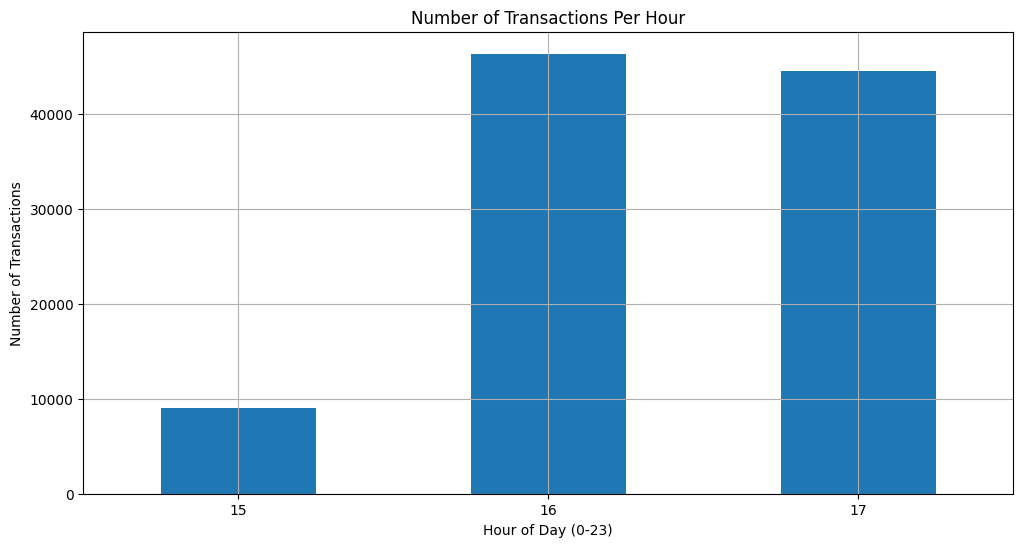

In [79]:
# Temporal Patterns: Analyzing transaction counts by hour

# Extracting hour from the timestamp
df['hour'] = df['block_timestamp'].dt.hour

# Grouping data by hour to count transactions
transaction_counts_by_hour = df.groupby('hour').size()

# Plotting the number of transactions per hour
plt.figure(figsize=(12, 6))
transaction_counts_by_hour.plot(kind='bar')
plt.title('Number of Transactions Per Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

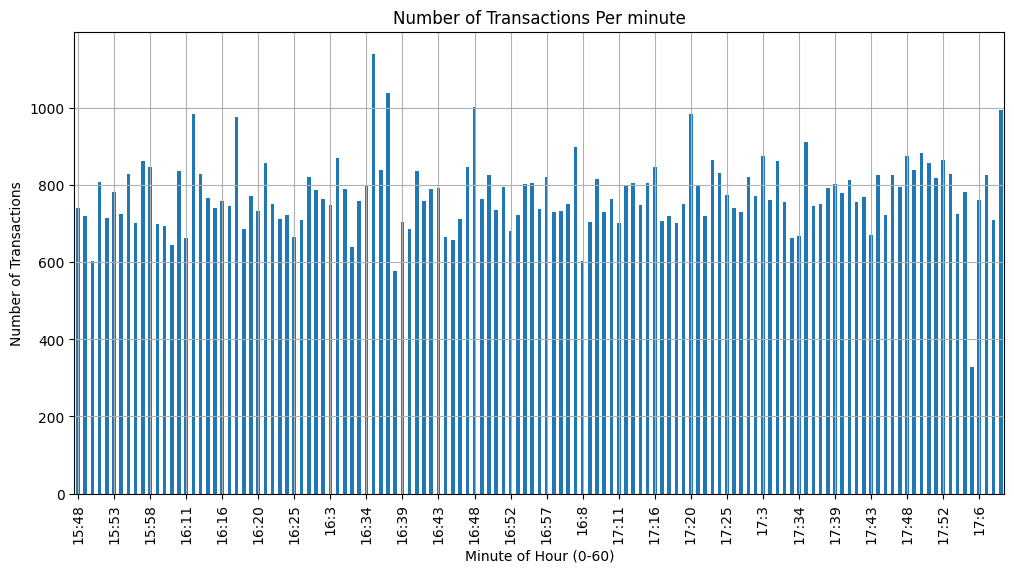

In [104]:
# Temporal Patterns: Analyzing transaction counts by minute
from matplotlib.ticker import MaxNLocator

# Extracting hour from the timestamp
# Extracting minute and hour from the timestamp for more granular analysis
df['minute_of_hour'] = df['block_timestamp'].dt.minute
df['hour_of_day'] = df['block_timestamp'].dt.hour

# Combining date, hour, and minute for a unique time identifier
df['date_hour_minute'] =  df['hour_of_day'].astype(str) + ':' + df['minute_of_hour'].astype(str)


# Grouping data by hour to count transactions
transaction_counts_by_hour = df.groupby('date_hour_minute').size()

# Plotting the number of transactions per hour
plt.figure(figsize=(12, 6))
transaction_counts_by_hour.plot(kind='bar')
plt.title('Number of Transactions Per minute')
plt.xlabel('Minute of Hour (0-60)')
plt.ylabel('Number of Transactions')

# Customizing the x-axis labels
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(MaxNLocator(nbins=30)) # Adjust 'nbins' as needed


plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Gas and Transaction Efficiency: 

We can visualize the distribution of gas used and gas prices, as well as how they change over time.

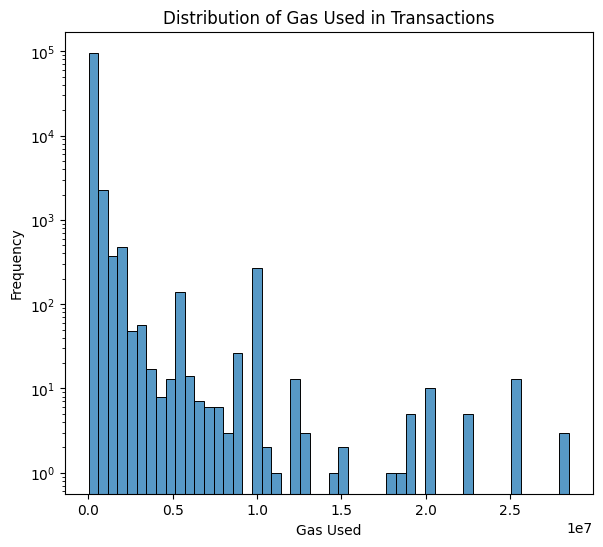

In [82]:
# Distribution of Gas Used
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['gas'], bins=50, kde=False)
plt.title('Distribution of Gas Used in Transactions')
plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to wide range of values

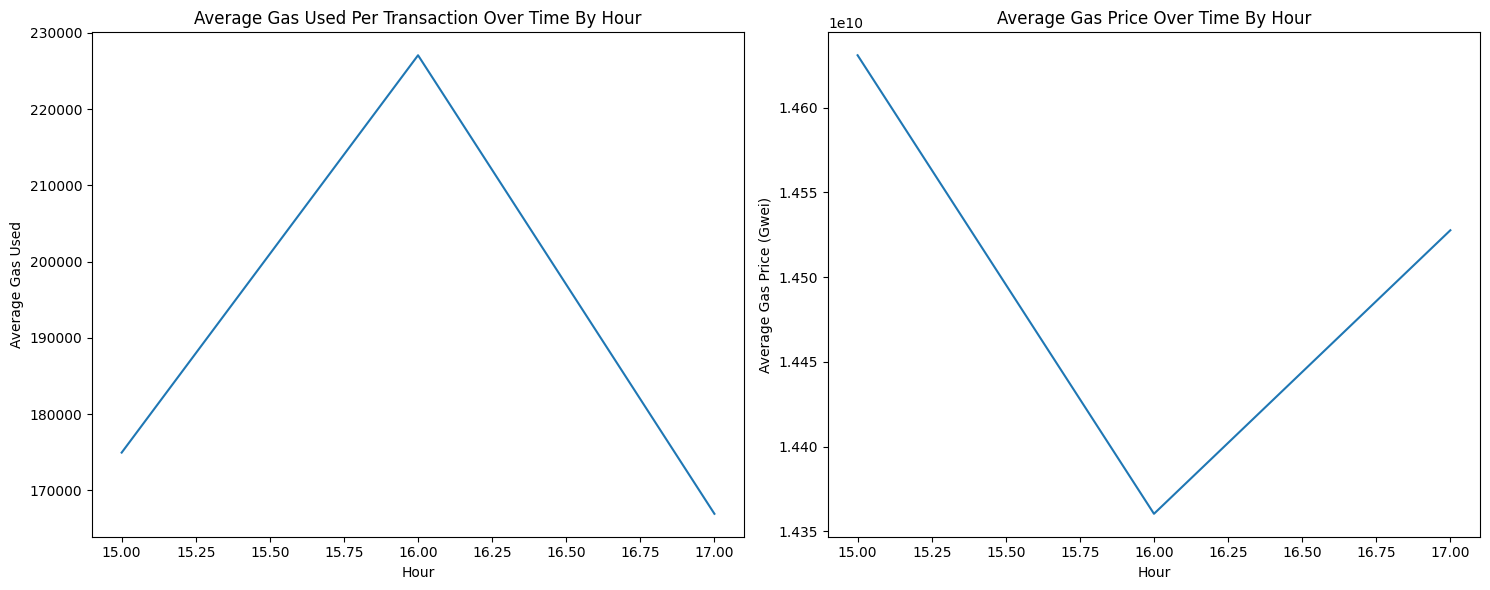

In [91]:
# Visualizing how Gas Used and Gas Prices change over time
# For simplicity, we will use the average values per hour
df['hour'] = df['block_timestamp'].dt.hour
avg_gas_by_day = df.groupby('hour')['gas'].mean()
avg_gas_price_by_day = df.groupby('hour')['gas_price'].mean()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
avg_gas_by_day.plot(kind='line')
plt.title('Average Gas Used Per Transaction Over Time By Hour')
plt.xlabel('Hour')
plt.ylabel('Average Gas Used')

plt.subplot(1, 2, 2)
avg_gas_price_by_day.plot(kind='line')
plt.title('Average Gas Price Over Time By Hour')
plt.xlabel('Hour')
plt.ylabel('Average Gas Price (Gwei)')

plt.tight_layout()
plt.show()

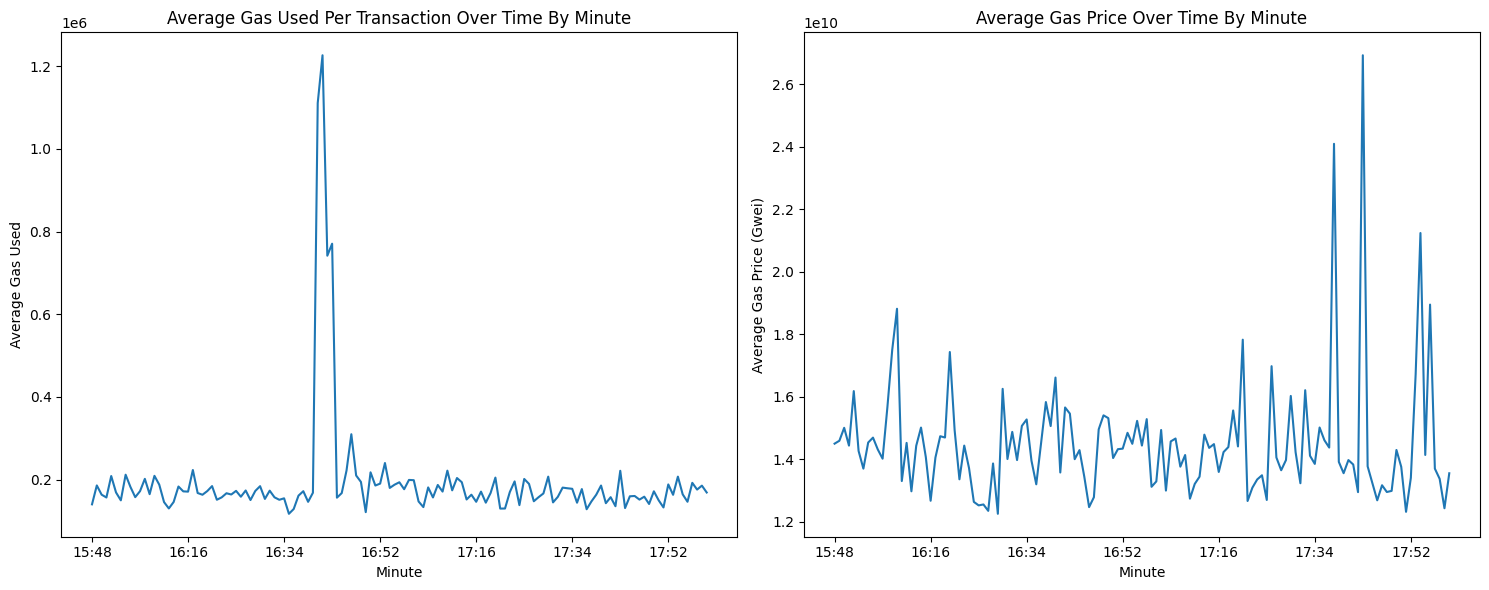

In [105]:
# For simplicity, we will use the average values per minute

# Extracting hour from the timestamp
# Extracting minute and hour from the timestamp for more granular analysis
df['minute_of_hour'] = df['block_timestamp'].dt.minute
df['hour_of_day'] = df['block_timestamp'].dt.hour

# Combining date, hour, and minute for a unique time identifier
df['date_hour_minute'] =  df['hour_of_day'].astype(str) + ':' + df['minute_of_hour'].astype(str)



avg_gas_by_day = df.groupby('date_hour_minute')['gas'].mean()
avg_gas_price_by_day = df.groupby('date_hour_minute')['gas_price'].mean()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
avg_gas_by_day.plot(kind='line')
plt.title('Average Gas Used Per Transaction Over Time By Minute')
plt.xlabel('Minute')
plt.ylabel('Average Gas Used')

plt.subplot(1, 2, 2)
avg_gas_price_by_day.plot(kind='line')
plt.title('Average Gas Price Over Time By Minute')
plt.xlabel('Minute')
plt.ylabel('Average Gas Price (Gwei)')

plt.tight_layout()
plt.show()

Average Gas Used Per Transaction by Minute:

</br>

This line chart shows the average gas used in transactions for each minute within an hour. While minute-to-minute variations might be more subtle, this chart can still highlight any short-term fluctuations in gas usage, potentially revealing finer-grained patterns or anomalies.

Average Gas Price by Minute:

</br>

This chart illustrates the average gas price (in Gwei) for each minute within an hour. Like the gas usage, minute-level variations might be less pronounced but can still provide insights into very short-term pricing dynamics.

## Smart Contract Interactions: 

</br>
We'll visualize the proportion of transactions that interact with smart contracts.

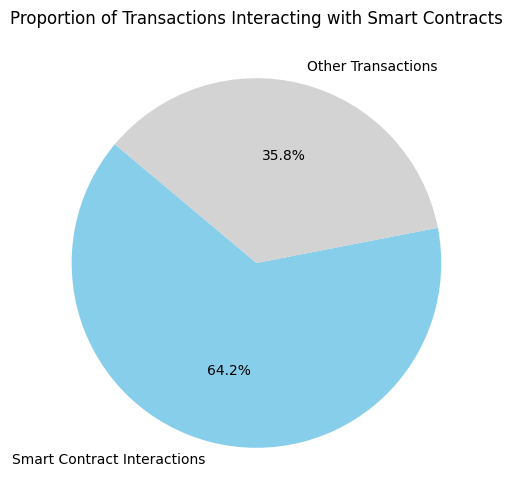

In [92]:
# Smart Contract Interactions: Visualizing the proportion of transactions interacting with smart contracts

# Identifying transactions with non-empty 'input' field as smart contract interactions
df['is_smart_contract_interaction'] = df['input'].apply(lambda x: x != '0x')

# Calculating the proportion of transactions that are smart contract interactions
smart_contract_interaction_proportion = df['is_smart_contract_interaction'].mean()

# Visualizing the proportion
plt.figure(figsize=(8, 6))
plt.pie([smart_contract_interaction_proportion, 1 - smart_contract_interaction_proportion], 
        labels=['Smart Contract Interactions', 'Other Transactions'], 
        autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
plt.title('Proportion of Transactions Interacting with Smart Contracts')
plt.show()

Insights:

Usage of Smart Contracts: The chart provides a clear view of how prevalent smart contract interactions are in the Ethereum network. A larger segment for smart contract interactions would indicate a significant use of Ethereum for more than just Ether transfers, highlighting its role as a platform for decentralized applications.

Network Activity Composition: Understanding the proportion of smart contract interactions can give insights into the composition of network activity, which is crucial for both users and developers. It helps in gauging the network's complexity and the demand for computational resources.

## Contract Creation Activity: 

We can plot the number of new contracts created over time.

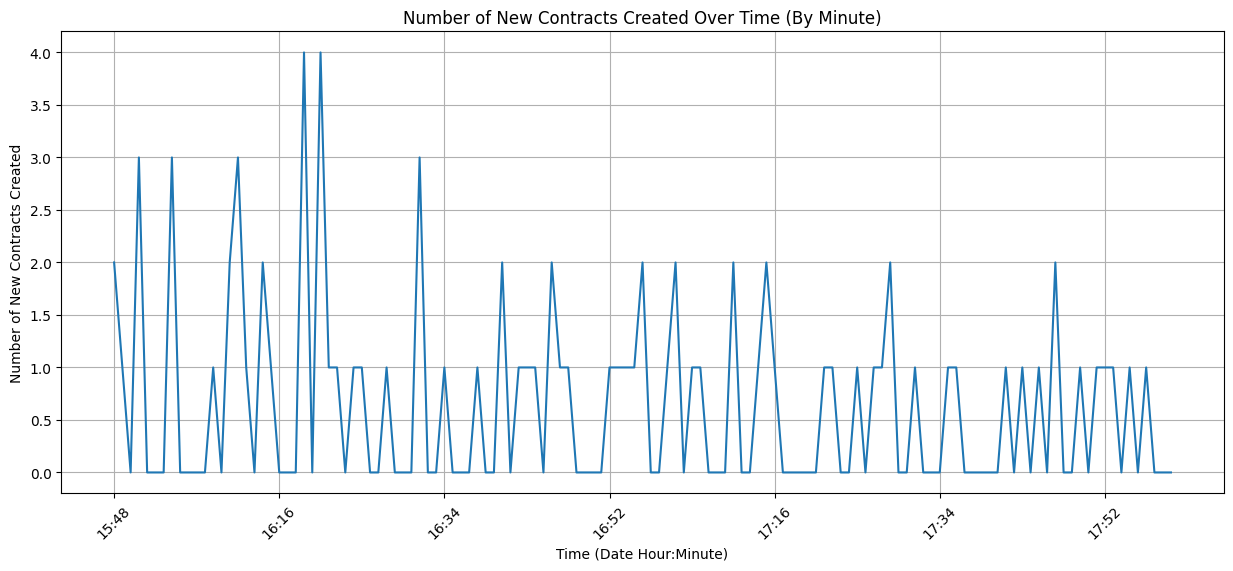

In [95]:
# Contract Creation Activity: Plotting the number of new contracts created by minute
df['is_contract_creation'] = df['receipt_contract_address'].notna()

# Extracting minute and hour from the timestamp for more granular analysis
df['minute_of_hour'] = df['block_timestamp'].dt.minute
df['hour_of_day'] = df['block_timestamp'].dt.hour

# Combining date, hour, and minute for a unique time identifier
df['date_hour_minute'] =  df['hour_of_day'].astype(str) + ':' + df['minute_of_hour'].astype(str)

# Grouping data by this unique time identifier to count new contract creations
contract_creation_counts_minute = df.groupby('date_hour_minute')['is_contract_creation'].sum()

# Plotting the number of new contracts created by minute
# Note: This will be a large plot, so we'll limit it to a subset of the data
sampled_contract_creation_counts_minute = contract_creation_counts_minute.head(1000)

plt.figure(figsize=(15, 6))
sampled_contract_creation_counts_minute.plot(kind='line')
plt.title('Number of New Contracts Created Over Time (By Minute)')
plt.xlabel('Time (Date Hour:Minute)')
plt.ylabel('Number of New Contracts Created')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Insights:
Granular View of Contract Creation: Plotting the data by minute offers a granular view of contract creation activity. This can reveal short-term spikes or patterns that might be related to specific events or periods of high activity.

High-Frequency Fluctuations: Unlike daily or hourly aggregations, minute-level data can exhibit more fluctuations, reflecting the immediacy of activities on the network.

Potential for Anomaly Detection: This level of detail can be useful for detecting anomalies or unusual bursts of activity, which might be indicative of specific events or trends in the developer community.

Limitations of Minute-Level Analysis: It's important to note that such fine-grained analysis may sometimes yield noisy data, making it challenging to discern clear trends. Additionally, the plot covers only a small portion of the entire dataset due to its size and complexity.

## Transaction Success and Failures: 

The receipt_status column is crucial for understanding the reliability of the network. Analyzing the proportion of successful vs. failed transactions, and identifying patterns or common reasons for failures can be insightful.

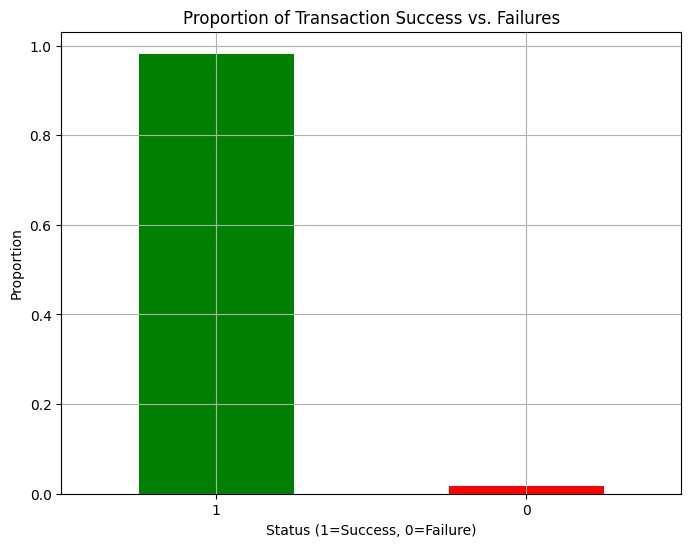

In [106]:
# Transaction Success and Failures: Visualizing the proportion of successful and failed transactions
# Calculating the proportion of transaction statuses
transaction_success_proportion = df['receipt_status'].value_counts(normalize=True)

# Visualizing the proportion
plt.figure(figsize=(8, 6))
transaction_success_proportion.plot(kind='bar', color=['green', 'red'])
plt.title('Proportion of Transaction Success vs. Failures')
plt.xlabel('Status (1=Success, 0=Failure)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Insights:
Network Reliability: The chart provides a clear indication of the Ethereum network's reliability. A high proportion of successful transactions suggests a stable and reliable network.

Impact of Network Conditions: The rate of failed transactions can be influenced by network conditions. For example, during times of high congestion or rapid changes in gas prices, the rate of failures might increase.

User Experience: The ratio of successes to failures can also reflect the user experience. A lower rate of failures implies that users are generally able to execute their transactions without issues.

Optimization Opportunities: For developers and network operators, understanding the proportion of failed transactions can help in identifying areas for optimization and improvement within the network or in user interfaces.

## Block-Level Analysis: 

We'll visualize the number of transactions per block and other related block-level metrics.

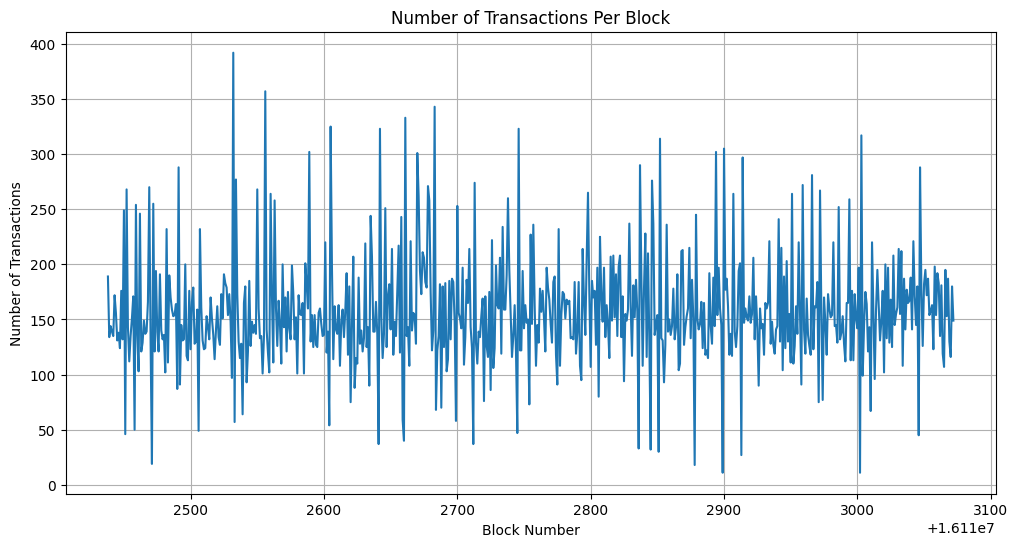

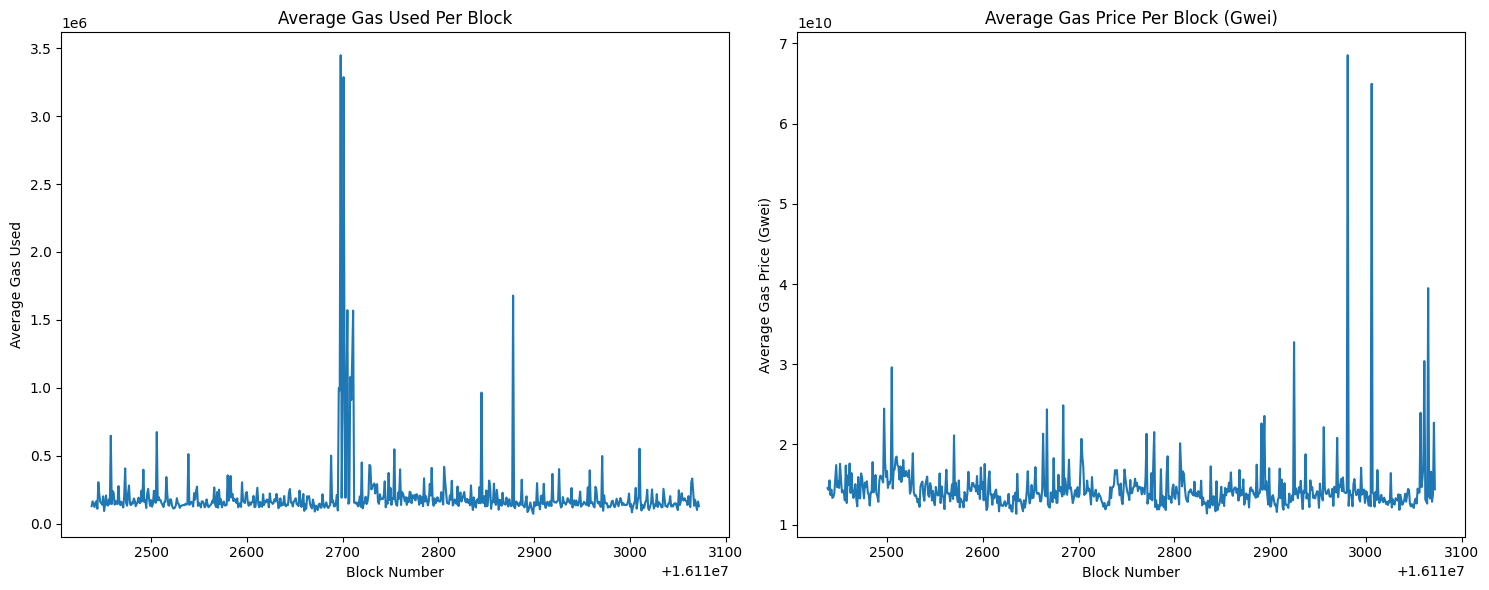

In [107]:
# Block-Level Analysis: Visualizing the number of transactions per block and other related block-level metrics

# Counting the number of transactions per block
transactions_per_block = df.groupby('block_number').size()

# Visualizing the number of transactions per block
plt.figure(figsize=(12, 6))
transactions_per_block.plot(kind='line')
plt.title('Number of Transactions Per Block')
plt.xlabel('Block Number')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# Calculating additional block-level metrics such as average gas used and average gas price per block
avg_gas_per_block = df.groupby('block_number')['gas'].mean()
avg_gas_price_per_block = df.groupby('block_number')['gas_price'].mean()

# Visualizing these metrics
plt.figure(figsize=(15, 6))

# Average Gas Used Per Block
plt.subplot(1, 2, 1)
avg_gas_per_block.plot(kind='line')
plt.title('Average Gas Used Per Block')
plt.xlabel('Block Number')
plt.ylabel('Average Gas Used')

# Average Gas Price Per Block
plt.subplot(1, 2, 2)
avg_gas_price_per_block.plot(kind='line')
plt.title('Average Gas Price Per Block (Gwei)')
plt.xlabel('Block Number')
plt.ylabel('Average Gas Price (Gwei)')

plt.tight_layout()
plt.show()


### Insights:
Block Utilization Trends: Understanding the number of transactions per block is crucial for assessing the Ethereum network's capacity and efficiency. It also helps in gauging the scalability of the network.

Resource Usage Patterns: The average gas used per block reflects the network's resource usage patterns. Blocks consistently using high amounts of gas might indicate a need for optimization or scaling solutions.

Gas Price Dynamics: The average gas price per block can provide insights into the economic aspects of the Ethereum network, particularly how users respond to changes in network demand.

# Which addresses have the highest average

In [108]:
# Average transaction value per sender address
average_value_per_sender = df.groupby('from_address')['value'].mean()

# Top 10 sender addresses with the highest average transaction value
top_value_senders = average_value_per_sender.sort_values(ascending=False).head(10)

(top_value_senders)

from_address
0x857f876490b63bdc7605165e0df568ae54f72d8e    1.000000e+21
0x64f25383bb3e1bfe80378a520c4d9459fe45c0a6    9.999997e+20
0xb9c6104599bfd4303683fedf9973184bde17b7a6    8.000000e+20
0xbb98f2a83d78310342da3e63278ce7515d52619d    7.956572e+20
0x52cadc4c160fdbc1e0830150815f67085ffa45a3    6.348416e+20
0xbce6c8da74c37dff24b45bafbe8001371dead223    5.700000e+20
0x2ba994a0511093a0b93e8094d1f4c025cef0211d    5.365026e+20
0xc37704a457b1ee87eb657cae584a34961e86acac    4.000500e+20
0x0e0dd4a9f1ae43300d537ba7d62220774c9c8312    3.999993e+20
0x70747df6ac244979a2ae9ca1e1a82899d02bbea4    3.938400e+20
Name: value, dtype: float64

In [109]:
# Average transaction value per receiver address
average_value_per_receiver = df.groupby('to_address')['value'].mean()
# Top 10 receiver addresses with the highest average transaction value
top_value_receivers = average_value_per_receiver.sort_values(ascending=False).head(10)
(top_value_receivers)

to_address
0x21a31ee1afc51d94c2efccaa2092ad1028285549    4.169131e+22
0xcd531ae9efcce479654c4926dec5f6209531ca7b    9.999997e+20
0x86e284421664840cb65c5b918da59c01ed8fa666    8.000000e+20
0x2b0c07573dbc5ba8b3ea72a48397baa2909664d7    7.956572e+20
0x52cadc4c160fdbc1e0830150815f67085ffa45a3    6.348431e+20
0xf0cf6b2af598c1f2909e148cbc5f5cc7c27b878b    5.035992e+20
0x64f25383bb3e1bfe80378a520c4d9459fe45c0a6    5.000000e+20
0xbda5ddd7cb8887799a0bd183a723e2c1e6470c28    4.362375e+20
0x0e0dd4a9f1ae43300d537ba7d62220774c9c8312    4.000000e+20
0xdece02a7c930d917d870ec8859434791f86d63c3    3.938400e+20
Name: value, dtype: float64

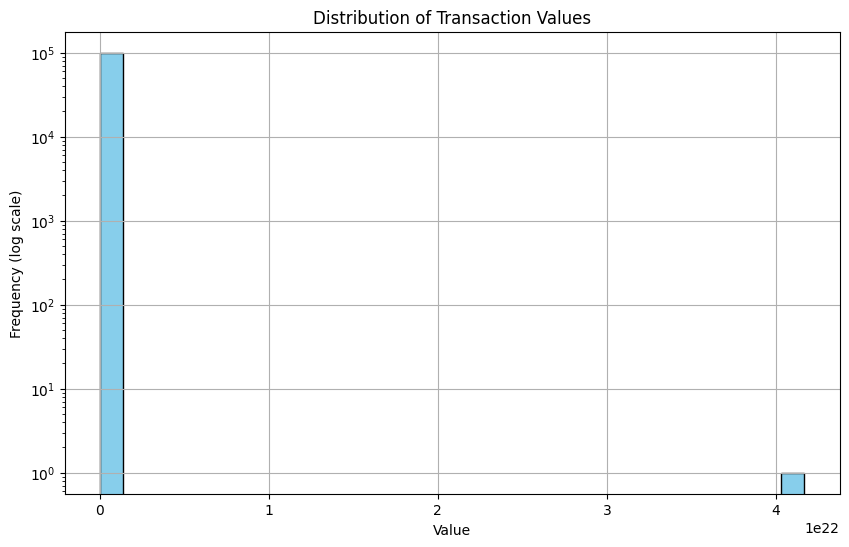

count    1.000000e+05
mean     8.415031e+17
std      1.321514e+20
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.898315e+16
max      4.169131e+22
Name: value, dtype: float64

In [68]:
import matplotlib.pyplot as plt
# Descriptive statistics for the 'value' column
value_description = df['value'].describe()

# Distribution of the transaction 'value'
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=30, log=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Values')
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

(value_description)

In [110]:
df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,...,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price,hour,minute,is_smart_contract_interaction,minute_of_hour,hour_of_day,date_hour_minute,is_contract_creation
0,0xa611438e5637c227e5080477b7180fc3d1c76710f2aa...,14,41,0x506a48155c891c78c04bc0b70eb1d9b2361635e0,0x7cc46cf6392ed9db45351a3f82eb2cc3b83da761,0.000000e+00,157911,12618483129,0xa0712d68000000000000000000000000000000000000...,2727153,...,2.500000e+09,2,12618483129,17,56,True,56,17,17:56,False
1,0xd5d2fe97f1fa4b772476e208f1e9a3441a0f54a020ac...,3,59,0x544c7de319b72b557a0c1fafccf5202813f9f3f7,0xf89d7b9c864f589bbf53a82105107622b35eaa40,1.708352e+15,21000,12118483129,0x,4348316,...,2.000000e+09,2,12118483129,17,56,False,56,17,17:56,False
2,0xc93e15158aa51a4d9a93c3c153868c8c89f4545c3445...,19,76,0x1562c07b34b828cedaadda6959a0b1362103b7b4,0x7dbfed48bddd2d4357f1f3c7dc45f5f85eb7100e,1.240000e+17,21000,11618483129,0x,5206151,...,1.500000e+09,2,11618483129,17,56,False,56,17,17:56,False
3,0x454bc286bda9cf62a43730e465df8e76c23124d6dde7...,17,83,0x0afaec415159835aab6d56fbc6a22e1d60c76c45,0x6448d7a20ece8c57212ad52b362b5c9b4feac27d,3.300000e+17,176364,11618483129,0x7649b957000000000000000000000000000000000000...,6065201,...,1.500000e+09,2,11618483129,17,56,True,56,17,17:56,False
4,0xba053083f0752cd5f9a152105698dba490d5992b9839...,993,90,0x7bd8477901552199e8208f62875aa94fab2fffb3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0.000000e+00,212432,11618483129,0x5ae401dc000000000000000000000000000000000000...,6620399,...,1.500000e+09,2,11618483129,17,56,True,56,17,17:56,False


<br/>
<br/>

### The distribution of transaction values is highly skewed, with most transactions having low values. This is common in financial data, where a large number of transactions are for small amounts, and a small number of transactions are for large amounts.

<br/>
<br/>


## So it seems that these data are for the transactions that took place between 15:00 - 17:00 on Sunday 04 / 12 / 2022

# Feature Engineering

hour_of_day: This represents the hour of the day (in 24-hour format) when the block containing the transaction was added to the blockchain.

day_of_week: This represents the day of the week (Monday=0, Sunday=6) when the block containing the transaction was added to the blockchain.

month: This represents the months when the block containing the transaction was added to the blockchain.
    
year: This represents the hour of the year when the block containing the transaction was added to the blockchain.
    
total_transactions_sender: This represents the total number of transactions made by the sender address in the dataset.

total_transactions_receiver: This represents the total number of transactions received by the receiver address in the dataset.

average_value_sender: This represents the average value of transactions made by the sender address in the dataset.

average_value_receiver: This represents the average value of transactions received by the receiver address in the dataset.

In [69]:
# Create time-based features
df['hour_of_day'] = df['block_timestamp'].dt.hour
df['minute'] = df['block_timestamp'].dt.minute
df['day_of_week'] = df['block_timestamp'].dt.dayofweek
df['month'] = df['block_timestamp'].dt.month
df['year'] = df['block_timestamp'].dt.year

# Total transactions made by each sender address
total_transactions_sender = df.groupby('from_address').size()
df['total_transactions_sender'] = df['from_address'].map(total_transactions_sender)

# Total transactions received by each receiver address
total_transactions_receiver = df.groupby('to_address').size()
df['total_transactions_receiver'] = df['to_address'].map(total_transactions_receiver)

# Average value of transactions made by each sender address
average_value_sender = df.groupby('from_address')['value'].mean()
df['average_value_sender'] = df['from_address'].map(average_value_sender)

# Average value of transactions received by each receiver address
average_value_receiver = df.groupby('to_address')['value'].mean()
df['average_value_receiver'] = df['to_address'].map(average_value_receiver)


df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,...,receipt_effective_gas_price,hour_of_day,minute,day_of_week,month,year,total_transactions_sender,total_transactions_receiver,average_value_sender,average_value_receiver
0,0xa611438e5637c227e5080477b7180fc3d1c76710f2aa...,14,41,0x506a48155c891c78c04bc0b70eb1d9b2361635e0,0x7cc46cf6392ed9db45351a3f82eb2cc3b83da761,0.000000e+00,157911,12618483129,0xa0712d68000000000000000000000000000000000000...,2727153,...,12618483129,17,56,6,12,2022,5,2,1.400000e+16,0.000000e+00
1,0xd5d2fe97f1fa4b772476e208f1e9a3441a0f54a020ac...,3,59,0x544c7de319b72b557a0c1fafccf5202813f9f3f7,0xf89d7b9c864f589bbf53a82105107622b35eaa40,1.708352e+15,21000,12118483129,0x,4348316,...,12118483129,17,56,6,12,2022,1,8785,1.708352e+15,8.036476e+15
2,0xc93e15158aa51a4d9a93c3c153868c8c89f4545c3445...,19,76,0x1562c07b34b828cedaadda6959a0b1362103b7b4,0x7dbfed48bddd2d4357f1f3c7dc45f5f85eb7100e,1.240000e+17,21000,11618483129,0x,5206151,...,11618483129,17,56,6,12,2022,1,1,1.240000e+17,1.240000e+17
3,0x454bc286bda9cf62a43730e465df8e76c23124d6dde7...,17,83,0x0afaec415159835aab6d56fbc6a22e1d60c76c45,0x6448d7a20ece8c57212ad52b362b5c9b4feac27d,3.300000e+17,176364,11618483129,0x7649b957000000000000000000000000000000000000...,6065201,...,11618483129,17,56,6,12,2022,1,56,3.300000e+17,3.861411e+17
4,0xba053083f0752cd5f9a152105698dba490d5992b9839...,993,90,0x7bd8477901552199e8208f62875aa94fab2fffb3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0.000000e+00,212432,11618483129,0x5ae401dc000000000000000000000000000000000000...,6620399,...,11618483129,17,56,6,12,2022,6,4286,2.015849e+17,2.536000e+17


# Data Preprocessing


### Handling Nan values

In [70]:
missing_values = df.isnull().sum()
missing_values

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
receipt_contract_address       99916
receipt_status                     0
block_timestamp                    0
block_number                       0
block_hash                         0
max_fee_per_gas                19634
max_priority_fee_per_gas       19634
transaction_type                   0
receipt_effective_gas_price        0
hour_of_day                        0
minute                             0
day_of_week                        0
month                              0
year                               0
total_transactions_sender          0
total_transactions_receiver        0
a

In [ ]:
# Displaying the process of handling NaN values

# Original DataFrame with NaN values
df_original_nan = df_model.isna().sum()
df_original_nan = df_original_nan[df_original_nan > 0]

# Filling NaN values with the mean of each respective column
df_filled = df_model.fillna(df_model.mean())

# DataFrame after handling NaN values
df_after_filling_nan = df_filled.isna().sum()

df_original_nan, df_after_filling_nan

In [50]:
# Encoding categorical variables (from_address, to_address) using label encoding
# This is a simple approach; depending on the model, other encoding methods might be more suitable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['from_address_encoded'] = encoder.fit_transform(df['from_address'])
df['to_address_encoded'] = encoder.fit_transform(df['to_address'])

In [51]:
# Feature Scaling
# Scaling numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
# Selecting numerical columns for scaling
numerical_cols = ['value', 'gas', 'gas_price', 'receipt_cumulative_gas_used', 
                  'receipt_gas_used', 'max_fee_per_gas', 'max_priority_fee_per_gas', 
                  'receipt_effective_gas_price', 'total_transactions_sender', 
                  'total_transactions_receiver', 'average_value_sender', 'average_value_receiver']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Checking the first few rows after preprocessing
df_preprocessed = df[['from_address_encoded', 'to_address_encoded'] + numerical_cols]
df_preprocessed.head(), missing_values

(   from_address_encoded  to_address_encoded     value       gas  gas_price  \
 0                 15560               12222 -0.006368 -0.047859  -0.040032   
 1                 16260               24163 -0.006355 -0.221974  -0.050905   
 2                  4286               12315 -0.005429 -0.221974  -0.061778   
 3                  2222                9853 -0.003871 -0.024392  -0.061778   
 4                 23734               10303 -0.006368  0.021477  -0.061778   
 
    receipt_cumulative_gas_used  receipt_gas_used  max_fee_per_gas  \
 0                    -0.732463          0.010841        -0.274565   
 1                    -0.453303         -0.182199         1.599863   
 2                    -0.305586         -0.182199        -0.355508   
 3                    -0.157660          0.037462        -0.355508   
 4                    -0.062057          0.138179        -0.358164   
 
    max_priority_fee_per_gas  receipt_effective_gas_price  \
 0                 -0.015562             

## Pick an algorithm:

- we will go with Isolation Forest or K-means, ideally both

## Training

In [53]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Using the preprocessed dataset for training
# Dropping non-numeric columns that are not needed for training
df_model = df_preprocessed.drop(columns=['from_address_encoded', 'to_address_encoded'])

# Splitting the dataset into training and testing sets
X_train, X_test = train_test_split(df_model, test_size=0.3, random_state=42)

# Creating the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Training the model
model.fit(X_train)

# Predicting anomalies on the test set
predictions = model.predict(X_test)

# Adding the predictions to the test set for analysis
X_test['anomaly'] = predictions

# Output a sample of the predictions
X_test.head()


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values